DL LAB 5: CNN with Regularization Techniques

Name : Mahesh Jagtap  Reg No 24MCS1017

Choose a suitable dataset. (Any one among, plant, medical, dental, marine, manufacturing, domain data)

1. Try to implement CNN and study the problem of overfitting
2. Apply L1 and L2, and write the inference
3. Apply Drop out and write the inference
4. Apply Data augmentation and write the inference
5. Apply Early Stopping and write your inference


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

x_train = x_train[:3000]
y_train = y_train[:3000]

x_test = x_test[:500]
y_test = y_test[:500]

# Print the shape to verify
print(x_train.shape)  # (3000, 32, 32, 3)
print(y_train.shape)  # (3000, 10)
print(x_test.shape)   # (500, 32, 32, 3)
print(y_test.shape)   # (500, 10)


(3000, 32, 32, 3)
(3000, 10)
(500, 32, 32, 3)
(500, 10)


In [ ]:
# for downlaoded dataset : 
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Define dataset directory (Change this path)
dataset_dir = "path/to/your/cifar10_folder"

# Define CIFAR-10 class labels
categories = [
    "airplane", "automobile", "bird", "cat", "deer", 
    "dog", "frog", "horse", "ship", "truck"
]

# Initialize lists to store images and labels
images = []
labels = []

# Load images from each category folder
for label, category in enumerate(categories):
    category_dir = os.path.join(dataset_dir, category)
    for filename in os.listdir(category_dir):
        img_path = os.path.join(category_dir, filename)
        img = load_img(img_path, target_size=(32, 32))  # Resize to 32x32
        img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0,1]
        images.append(img_array)
        labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images).astype("float32")  # Convert images to NumPy array
labels = np.array(labels)

# Convert labels to categorical format (One-hot encoding)
labels = keras.utils.to_categorical(labels, num_classes=10)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

# Select subset of training and testing data
x_train = x_train[:3000]
y_train = y_train[:3000]

x_test = x_test[:500]
y_test = y_test[:500]

# Print shape to verify
print("Train images shape:", x_train.shape)  # (3000, 32, 32, 3)
print("Train labels shape:", y_train.shape)  # (3000, 10)
print("Test images shape:", x_test.shape)   # (500, 32, 32, 3)
print("Test labels shape:", y_test.shape)   # (500, 10)


In [14]:
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Change epochs to 10
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))



Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.1609 - loss: 2.2353 - val_accuracy: 0.3180 - val_loss: 1.9076
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3269 - loss: 1.8474 - val_accuracy: 0.2960 - val_loss: 1.8909
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3940 - loss: 1.6935 - val_accuracy: 0.3740 - val_loss: 1.6913
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4520 - loss: 1.5218 - val_accuracy: 0.4600 - val_loss: 1.5339
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5256 - loss: 1.3911 - val_accuracy: 0.4140 - val_loss: 1.5971
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5135 - loss: 1.3584 - val_accuracy: 0.4660 - val_loss: 1.4962
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.5814 - loss: 1.2409 - val_accuracy: 0.4420 - val_loss: 1.5085
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.5932 - loss: 1.1830 - val_accuracy: 0.4700 - v

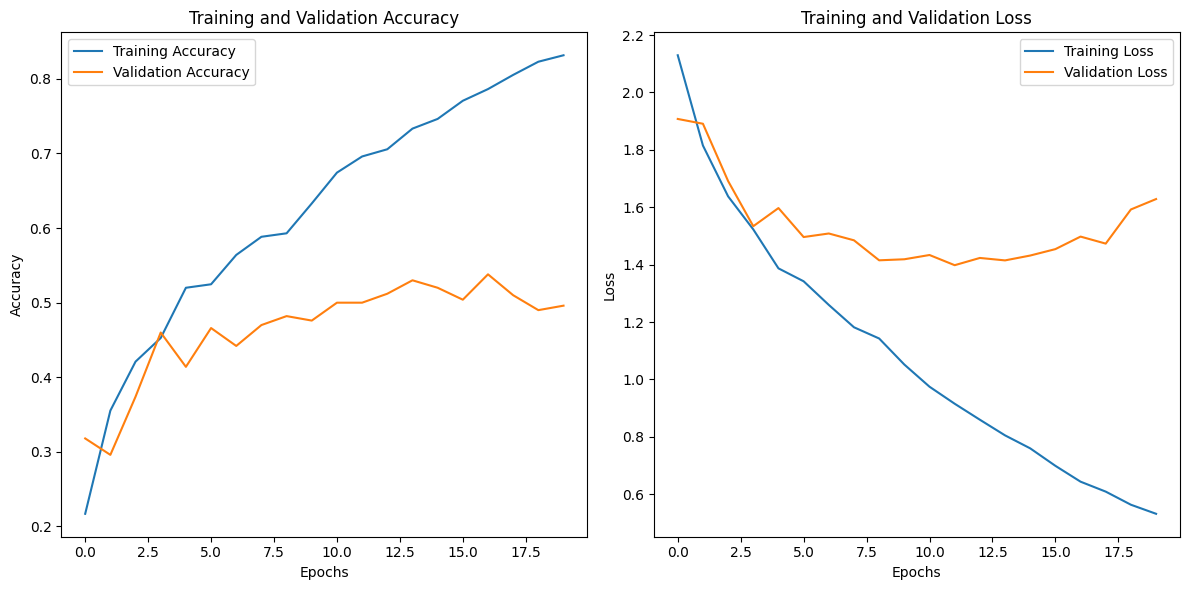

In [15]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


Training and Validation Accuracy:

The training accuracy increases steadily from around 0.2 to above 0.8 over the epochs, showing that the model is learning the training data well.

However, the validation accuracy (orange line) starts around 0.3, rises to about 0.5, and then fluctuates around this value without significant improvement. This lack of improvement suggests that the model isn't performing well on unseen data.

Training and Validation Loss:

The training loss  decreases steadily from above 2.0 to below 0.6, further indicating that the model is fitting the training data well.

In contrast, the validation loss (orange line) starts around 2.0, drops to about 1.4, and then fluctuates without a clear downward trend. This discrepancy suggests that the model isn't generalizing well to new data.

Inference: The model is overfitting. While it performs well on the training data, it struggles to maintain high accuracy and low loss on the validation data, indicating poor generalization. This overfitting could be addressed by techniques such as using more data, applying regularization methods, or early stopping.

2. Applying Regularization

In [17]:
from tensorflow.keras import layers, models, regularizers

# Define the initial model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        # Add L1 and L2 regularization to the Dense layer
        layers.Dense(10, activation='softmax',
                     kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01))
    ])
    return model

# Create the model with L1 and L2 regularization
model_l1_l2 = create_model()

# Compile the model
model_l1_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_l1_l2 = model_l1_l2.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))



Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.1224 - loss: 5.2392 - val_accuracy: 0.2100 - val_loss: 2.3653
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.1471 - loss: 2.3400 - val_accuracy: 0.2600 - val_loss: 2.2091
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.2367 - loss: 2.2172 - val_accuracy: 0.3020 - val_loss: 2.1517
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.2705 - loss: 2.1424 - val_accuracy: 0.3020 - val_loss: 2.1157
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.2908 - loss: 2.0978 - val_accuracy: 0.3020 - val_loss: 2.1156
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.2815 - loss: 2.1099 - val_accuracy: 0.3020 - val_loss: 2.0865
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.3277 - loss: 2.0592 - val_accuracy: 0.3020 - val_loss: 2.0811
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.3368 - loss: 2.0260 - val_accuracy: 0.3640 - v

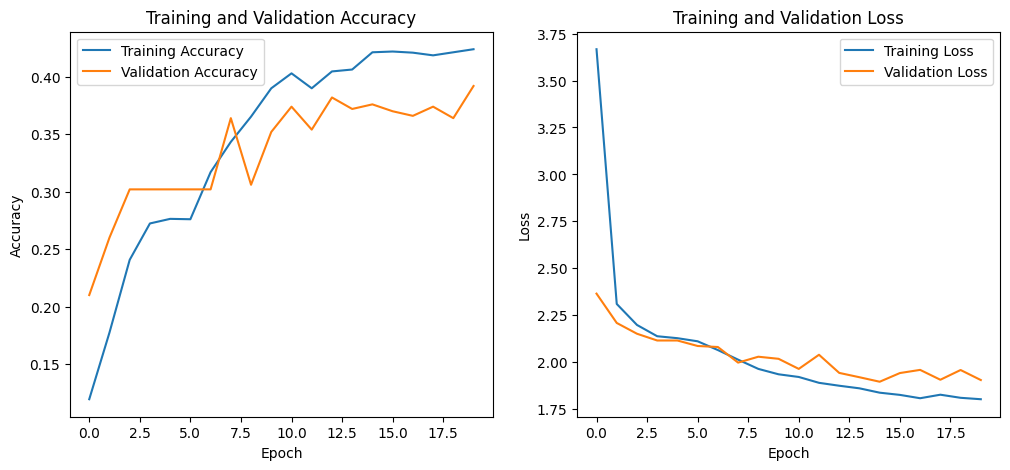

In [19]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_l1_l2.history['accuracy'], label='Training Accuracy')
plt.plot(history_l1_l2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_l1_l2.history['loss'], label='Training Loss')
plt.plot(history_l1_l2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Training and Validation Accuracy:

The training accuracy shows a steady increase, indicating that the model is learning the training data well.

The validation accuracy also shows an upward trend, which is a good sign. This suggests that the model is now generalizing better to unseen data compared to before.

Training and Validation Loss:

The training loss decreases steadily, which means the model is fitting the training data well.

The validation loss also decreases, but not as smoothly as the training loss. This indicates that there is still some fluctuation, but overall, the model's performance on unseen data has improved.

Inference: The application of L1 and L2 regularization has helped in reducing overfitting. The model's performance on both training and validation data has improved, as seen by the steady increase in validation accuracy and the decrease in validation loss. This indicates that the regularization techniques have encouraged the model to maintain simplicity and avoid fitting too closely to the training data, thus improving generalization.

3. Early stopping

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restore the best weights when training stops
)

# Create the model with L1 and L2 regularization
model_l1_l2 = create_model()

# Compile the model
model_l1_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history_l1_l2 = model_l1_l2.fit(
    x_train, y_train,
    epochs=20,  # Maximum number of epochs
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]  # Add the EarlyStopping callback
)

# Evaluate the model
test_loss, test_accuracy = model_l1_l2.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.1255 - loss: 5.1718 - val_accuracy: 0.1800 - val_loss: 2.3181
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.1989 - loss: 2.2928 - val_accuracy: 0.2800 - val_loss: 2.1903
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.2444 - loss: 2.1863 - val_accuracy: 0.2960 - val_loss: 2.1410
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.2739 - loss: 2.1307 - val_accuracy: 0.2640 - val_loss: 2.1461
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.2651 - loss: 2.1299 - val_accuracy: 0.3100 - val_loss: 2.0572
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.2975 - loss: 2.0769 - val_accuracy: 0.3240 - val_loss: 2.0428
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3202 - loss: 2.0634 - val_accuracy: 0.3500 - val_loss: 2.0427
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.3331 - loss: 2.0366 - val_accuracy: 0.3720 - v

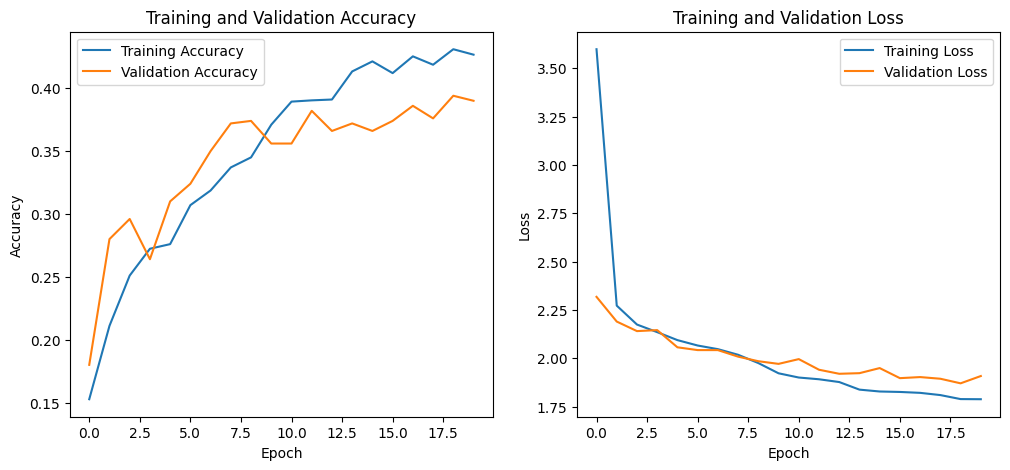

In [21]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_l1_l2.history['accuracy'], label='Training Accuracy')
plt.plot(history_l1_l2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_l1_l2.history['loss'], label='Training Loss')
plt.plot(history_l1_l2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1. **Training and Validation Accuracy**:
   - Both the training and validation accuracy show an upward trend.
   - The training accuracy increases steadily throughout the epochs.
   - The validation accuracy peaks around epoch 10 and then slightly decreases, suggesting that the model's ability to generalize to new data improves up to a certain point but then starts to decline slightly.

2. **Training and Validation Loss**:
   - The training loss decreases steadily, indicating that the model fits the training data well.
   - The validation loss also decreases but shows more fluctuation compared to the training loss.

**Inference**: Early stopping has helped mitigate overfitting by halting the training process before the model starts to overfit the training data. The improvement in validation accuracy and the reduction in validation loss suggest better generalization to new data. However, the slight decrease in validation accuracy after epoch 10 indicates that the model might still need some fine-tuning or additional regularization techniques to further enhance its performance.




4.dropout

In [22]:
from tensorflow.keras import layers, models, regularizers

# Define the model with dropout
def create_model_with_dropout():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),  # Dropout layer after the first pooling layer
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),  # Dropout layer after the second pooling layer
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Dropout layer before the final Dense layer
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create the model with dropout
model_dropout = create_model_with_dropout()

# Compile the model
model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dropout = model_dropout.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test)
)

# Evaluate the model
test_loss, test_accuracy = model_dropout.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.1123 - loss: 2.3155 - val_accuracy: 0.2720 - val_loss: 2.0685
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.2160 - loss: 2.0658 - val_accuracy: 0.3240 - val_loss: 1.8994
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.2954 - loss: 1.8864 - val_accuracy: 0.3880 - val_loss: 1.7618
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3444 - loss: 1.7455 - val_accuracy: 0.4080 - val_loss: 1.6850
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.3896 - loss: 1.6808 - val_accuracy: 0.4200 - val_loss: 1.5896
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.4175 - loss: 1.6055 - val_accuracy: 0.4180 - val_loss: 1.5768
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.4315 - loss: 1.5544 - val_accuracy: 0.4540 - val_loss: 1.5393
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.4465 - loss: 1.5006 - val_accuracy: 0.4620 - 

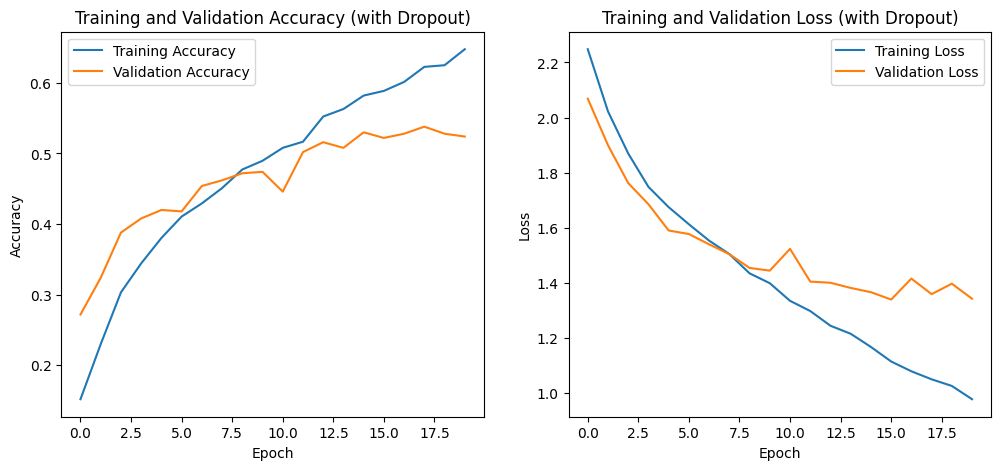

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (with Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['loss'], label='Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (with Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Inference: The application of dropout has had a positive effect, improving the model's generalization ability. The increase in validation accuracy from 0.39 to 0.52 and the decrease in validation loss indicate that dropout helps prevent overfitting, leading to better performance on new data.

5.Data Augmentation

In [24]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model (same as before)
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create the model
model_aug = create_model()

# Compile the model
model_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # Randomly rotate images by 15 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by 10%
    height_shift_range=0.1, # Randomly shift images vertically by 10%
    horizontal_flip=True,   # Randomly flip images horizontally
    zoom_range=0.1          # Randomly zoom images by 10%
)

# Fit the data augmentation to the training data
datagen.fit(x_train)

# Train the model with data augmentation
history_aug = model_aug.fit(
    datagen.flow(x_train, y_train, batch_size=64),  # Use augmented data
    epochs=20,
    validation_data=(x_test, y_test)
)

# Evaluate the model
test_loss, test_accuracy = model_aug.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.1686 - loss: 2.2391 - val_accuracy: 0.2160 - val_loss: 2.1456
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.2899 - loss: 1.9508 - val_accuracy: 0.3380 - val_loss: 1.8363
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.3650 - loss: 1.7543 - val_accuracy: 0.3860 - val_loss: 1.6739
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.3898 - loss: 1.6685 - val_accuracy: 0.3980 - val_loss: 1.6527
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.4134 - loss: 1.6280 - val_accuracy: 0.4000 - val_loss: 1.6279
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.4357 - loss: 1.5339 - val_accuracy: 0.4500 - val_loss: 1.5608
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.4328 - loss: 1.5233 - val_accuracy: 0.4180 - val_loss: 1.5343
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.4879 - loss: 1.4641 - val_accuracy: 0.4280 - val_

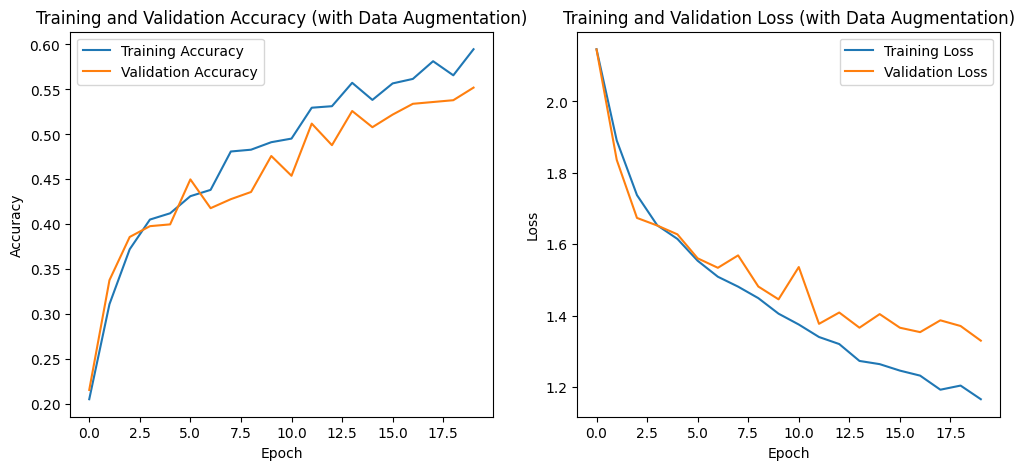

In [25]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (with Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Training Loss')
plt.plot(history_aug.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (with Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Inference: The application of data augmentation has successfully enhanced the model's generalization ability. The increase in validation accuracy to 0.55 and the decrease in validation loss demonstrate that the model is now better equipped to handle new data and has reduced overfitting.

**Conclusion:**
Throughout your experiments, various techniques were employed to reduce overfitting and improve your model’s generalization:

Initial Training: The model showed overfitting.

L1 and L2 Regularization: Reduced overfitting slightly.

Early Stopping: Prevented overfitting by halting training at the right time.

Dropout: Improved validation accuracy from 0.39 to 0.52.

Data Augmentation: Further increased validation accuracy to 0.55.

Overall, these techniques collectively enhanced the model’s performance on unseen data, leading to better generalization and reduced overfitting.